In [1]:
import pandas as pd
import numpy as np
import glob
from wordcloud import WordCloud, STOPWORDS
from matplotlib import font_manager, rc
from pandas import DataFrame
from PIL import Image


import konlpy
from konlpy.tag import Okt

import matplotlib.pyplot as plt
import re


In [11]:
import nltk

----

### 기존 데이터 가져오기

In [2]:
# 불러오기
import pickle

book_morphs_with_isbn_pos_non_stopword = []
with open('data/detail_bestbook_unit_isbn_with_isbn_pos_non_stopword.txt', 'rb') as lf:
    book_morphs_with_isbn_pos_non_stopword = pickle.load(lf)
    
print(book_morphs_with_isbn_pos_non_stopword[40])

[9788959752195, [('내', 'Noun'), ('가제', 'Noun'), ('일', 'Noun'), ('좋아하다', 'Adjective'), ('책', 'Noun'), ('이', 'Noun'), ('당', 'Noun'), ('6', 'Number')]]


In [6]:
print(book_morphs_with_isbn_pos_non_stopword[40])

[9791189680244, [('화석', 'Noun'), ('의', 'Noun'), ('처음', 'Noun'), ('부터', 'Noun'), ('끝', 'Noun'), ('까지', 'Josa'), ('모든', 'Noun'), ('것', 'Noun'), ('이', 'Noun'), ('담기다', 'Verb'), ('책', 'Noun'), ('이라', 'Verb'), ('무척', 'Noun'), ('흥미롭다', 'Adjective'), ('고고학', 'Noun'), ('에', 'Josa'), ('관심', 'Noun'), ('많다', 'Adjective'), ('우리', 'Noun'), ('아들', 'Noun'), ('이랑', 'Josa'), ('같이', 'Adverb'), ('읽다', 'Verb'), ('보다', 'Verb')]]


In [3]:
#  도서 불용어를 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','것','라고','에게','라면','을','이라',
             '라니','있다','아','랑','쯤된','에서','에선','어','이지만','으로나','때','때는','때라면','때라서','라','이다','있','죠','고','니','로','있','같',
             '어서','어요','는데','습니다','면서','많이','마','더','그렇다','의','당','좀','책','안','볼','게','안','정말','듯','이제야','여','요','게다가','같다',
            '임','로서','이제','만','인','붙이','그','저','수','가제','부터','닷','저희','적','알','쉬','못','꼭','살','제','권','제','분','나','내', '진작', '전', '뿐'
            , '대한','대해','책','좋다','없다','아니다']

In [7]:
######### 태깅한 데이터 중에서 명사 + 형용사(1이상) + 불용어 처리

# book_train_nouns_adj = []
book_isbn_na = []
for (isbn, test) in book_morphs_with_isbn_pos_non_stopword :
    tmp =[isbn]
    tts = [(word,pos) for (word,pos) in test if not word in stopwords] #불용어 처리

    na = [word for (word,pos) in tts if pos in ('Noun' or 'Verb')] # 명사만 저장
    for (word,pos) in tts : #형용사 : 길이가 1이상
        if pos == 'Adjective' and len(word)>1 :
            na.append(word)
    if na : 
        tmp.append(na)
        book_isbn_na.append(tmp)
#         book_train_isbn.append(isbn)

print('**********************END***************************')
print(len(book_isbn_na))
# print(len(book_train_isbn))

**********************END***************************
42463


In [8]:
for i in range(0,5) :
#     print(book_morphs_with_isbn_pos_non_stopword[i])
    print(book_isbn_na[i])

[9788959752195, ['일', '좋아하다']]
[9791136202772, ['처음', '제목', '보고', '예상', '스토리', '완전', '신간', '홀린', '장바구니', '사서', '맘', '사서', '걸', '조금', '여자', '이야기', '다르다', '유쾌하다', '유치하다']]
[9791127420949, ['덕분', '그릴', '별', '개', '사실', '정도', '채색', '채색', '별', '기대', '생각', '내용', '두고두고', '귀엽다', '기쁘다', '아쉽다', '알차다']]
[9791164383252, ['구매', '쭉', '지리', '여행', '여행', '가기']]
[9788995797020, ['요가', '궁극', '의미', '요가', '수행자', '위', '메시지', '방법', '과정', '자세', '설명', '알다', '정리', '매우', '서적', '요가', '공부', '위해', '구입', '공부', '도움', '요가', '교과서', '말', '요가', '백과사전', '식', '명작', '설명', '그림', '첨부', '재미', '실제', '응용', '위', '참고서', '아헹', '선생님', '요가', '알라딘', '쿠폰', '무료', '배송', '보아', '요가', '교과서', '최고', '요가', '입문', '무리', '유익하다', '어렵다', '자세하다', '훌륭하다']]


In [30]:
# 명사, 동사, 형용사 저장
import pickle
with open('data/wordcloud_wordlist.txt','wb') as lf :
    pickle.dump(book_isbn_na,lf)

In [31]:
# 명사, 동사, 형용사 데이터 로드
readList = []
with open('data/wordcloud_wordlist.txt', 'rb') as lf:
    readList = pickle.load(lf)
    
print(readList[4])

[9788995797020, ['요가', '궁극', '의미', '요가', '수행자', '위', '메시지', '방법', '과정', '자세', '설명', '알다', '정리', '매우', '서적', '요가', '공부', '위해', '구입', '공부', '도움', '요가', '교과서', '말', '요가', '백과사전', '식', '명작', '설명', '그림', '첨부', '재미', '실제', '응용', '위', '참고서', '아헹', '선생님', '요가', '알라딘', '쿠폰', '무료', '배송', '보아', '요가', '교과서', '최고', '요가', '입문', '무리', '유익하다', '어렵다', '자세하다', '훌륭하다']]


In [12]:
token_sample = book_isbn_na[4][1]
name_sample = book_isbn_na[4][0]
print(name_sample)
ko = nltk.Text(token_sample, name=name_sample)

9788995797020


In [22]:
ko = ''
for isbn, word in book_isbn_na :
    if isbn == 9788992647199 : 
        token_sample = word
        ko = nltk.Text(token_sample, name=9788992647199)
        break

In [23]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

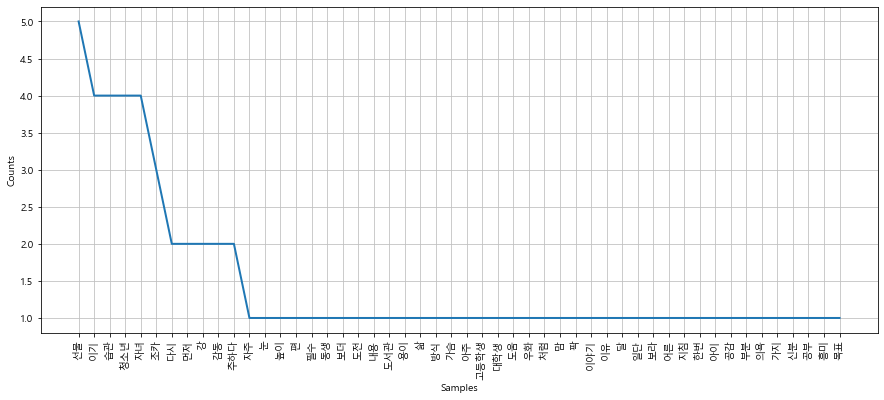

In [24]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [25]:
print(ko)

<Text: 9788992647199>


In [26]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [27]:
data = ko.vocab().most_common(300)

In [28]:
print(data)

[('선물', 5), ('이기', 4), ('습관', 4), ('청소년', 4), ('자녀', 4), ('조카', 3), ('다시', 2), ('먼저', 2), ('강', 2), ('감동', 2), ('추하다', 2), ('자주', 1), ('눈', 1), ('높이', 1), ('편', 1), ('필수', 1), ('동생', 1), ('보더', 1), ('도전', 1), ('내용', 1), ('도서관', 1), ('용이', 1), ('삶', 1), ('방식', 1), ('가슴', 1), ('아주', 1), ('고등학생', 1), ('대학생', 1), ('도움', 1), ('우화', 1), ('처럼', 1), ('맘', 1), ('팍', 1), ('이야기', 1), ('이유', 1), ('달', 1), ('일단', 1), ('보라', 1), ('어른', 1), ('지침', 1), ('한번', 1), ('아이', 1), ('공감', 1), ('부분', 1), ('의욕', 1), ('가지', 1), ('신분', 1), ('공부', 1), ('흥미', 1), ('목표', 1), ('준', 1), ('위', 1), ('소', 1), ('극적', 1), ('성격', 1), ('아들', 1), ('적극성', 1), ('위해', 1), ('방황', 1), ('친구', 1), ('마음', 1), ('의문', 1), ('기주', 1), ('사람', 1), ('보고', 1), ('중학생', 1), ('두고두고', 1), ('직장', 1), ('야망', 1), ('함', 1), ('다른', 1), ('책보', 1), ('훨신', 1), ('추천', 1), ('가볍다', 1), ('유명하다', 1), ('고맙다', 1), ('지루하다', 1), ('많다', 1), ('소심하다', 1), ('만족스럽다', 1), ('강하다', 1), ('완전하다', 1), ('뛰어나다', 1)]


In [32]:
rate_data = []
for isbn, word in book_isbn_na :
    tmplist = [isbn]
    ko = nltk.Text(token_sample, name=isbn)
    data = ko.vocab().most_common(300)
    tmplist.append(data)
    rate_data.append(tmplist)
    


In [35]:
with open('data/wordcloud_wordcnt.txt','wb') as lf :
    pickle.dump(rate_data,lf)

In [37]:
# 갯수
count = []
with open('data/wordcloud_wordcnt.txt', 'rb') as lf:
    count = pickle.load(lf)
    
print(count[4])

[9788995797020, [('선물', 5), ('이기', 4), ('습관', 4), ('청소년', 4), ('자녀', 4), ('조카', 3), ('다시', 2), ('먼저', 2), ('강', 2), ('감동', 2), ('추하다', 2), ('자주', 1), ('눈', 1), ('높이', 1), ('편', 1), ('필수', 1), ('동생', 1), ('보더', 1), ('도전', 1), ('내용', 1), ('도서관', 1), ('용이', 1), ('삶', 1), ('방식', 1), ('가슴', 1), ('아주', 1), ('고등학생', 1), ('대학생', 1), ('도움', 1), ('우화', 1), ('처럼', 1), ('맘', 1), ('팍', 1), ('이야기', 1), ('이유', 1), ('달', 1), ('일단', 1), ('보라', 1), ('어른', 1), ('지침', 1), ('한번', 1), ('아이', 1), ('공감', 1), ('부분', 1), ('의욕', 1), ('가지', 1), ('신분', 1), ('공부', 1), ('흥미', 1), ('목표', 1), ('준', 1), ('위', 1), ('소', 1), ('극적', 1), ('성격', 1), ('아들', 1), ('적극성', 1), ('위해', 1), ('방황', 1), ('친구', 1), ('마음', 1), ('의문', 1), ('기주', 1), ('사람', 1), ('보고', 1), ('중학생', 1), ('두고두고', 1), ('직장', 1), ('야망', 1), ('함', 1), ('다른', 1), ('책보', 1), ('훨신', 1), ('추천', 1), ('가볍다', 1), ('유명하다', 1), ('고맙다', 1), ('지루하다', 1), ('많다', 1), ('소심하다', 1), ('만족스럽다', 1), ('강하다', 1), ('완전하다', 1), ('뛰어나다', 1)]]


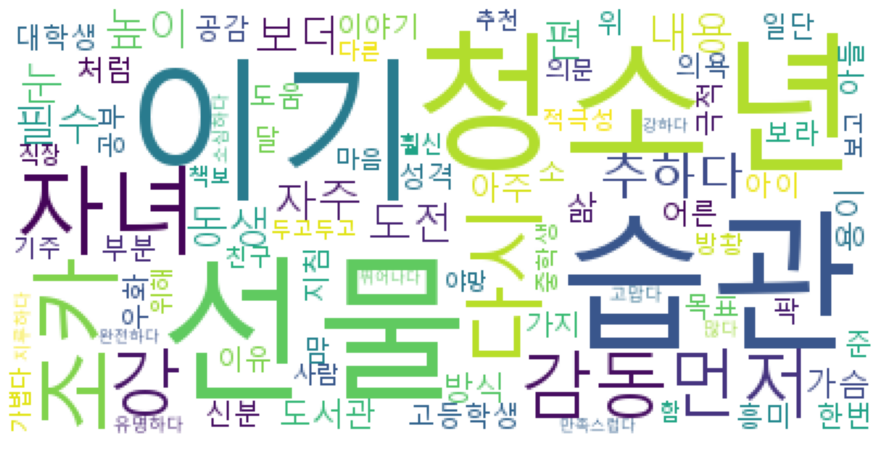

In [29]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()